In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from scipy.stats import norm
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# EXTRA_COL_ADD = Fals
Training_CSV = 'New/Results.csv'
Case_CSV = 'New/BuildingLab_feature.csv'

df = pd.read_csv(Training_CSV)
df_variant = pd.read_csv(Case_CSV)

In [2]:
df_variant

,Simulation,Terrain,Orientation,NumberOfFloors,FloorHeight,Shading,EnergyStandard,HVAC-System,ServiceHotWater,Open Office: Heating Setpoint,...,Construction Area [%],Window to Wall Ratio North [%],Window to Wall Ratio East [%],Window to Wall Ratio South [%],Window to Wall Ratio West [%],HVAC-System Capacity [kW],Baseboard Capacity Sum [kW],EUI [kWh/m²a],EUI Heating [kWh/m²a],EUI Electricity [kWh]
0,NaN,0,12.5,4,3.48,0,0,0,3,22,...,6,50,45,34,23,NaN,NaN,NaN,NaN,NaN
1,NaN,0,12.5,4,3.48,0,1,0,3,22,...,6,50,45,34,23,NaN,NaN,NaN,NaN,NaN
2,NaN,0,12.5,4,3.48,0,2,0,3,22,...,6,50,45,34,23,NaN,NaN,NaN,NaN,NaN
3,NaN,0,12.5,4,3.48,0,0,1,3,22,...,6,50,45,34,23,NaN,NaN,NaN,NaN,NaN
4,NaN,0,12.5,4,3.48,0,1,1,3,22,...,6,50,45,34,23,NaN,NaN,NaN,NaN,NaN
5,NaN,0,12.5,4,3.48,0,2,1,3,22,...,6,50,45,34,23,NaN,NaN,NaN,NaN,NaN
6,NaN,0,12.5,4,3.48,0,0,2,3,22,...,6,50,45,34,23,NaN,NaN,NaN,NaN,NaN
7,NaN,0,12.5,4,3.48,0,1,2,3,22,...,6,50,45,34,23,NaN,NaN,NaN,NaN,NaN
8,NaN,0,12.5,4,3.48,0,2,2,3,22,...,6,50,45,34,23,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,Simulation,Unnamed: 0,Terrain,Orientation,NumberOfFloors,FloorHeight,Fassade,RasterLength-X,RasterLength-Y,Arm-Latitudinal-NumberOfSegments,...,EUI Natrual Gas [kWh/m?a],EUI District Heating [kWh/m?a],EUI District Cooling [kWh/m?a],Boiler Design Size Nominal Capacity [kW],CentralAirSourceHeatPumpCapacity[kW],District Heating Peak [kW],Baseboard Capacity Average [kW],Baseboard Capacity Sum [kW],Service Hot Water Tank Volume [m],Service Hot Water Design Flow Rate [l/min]
0,Simulation000,0,Suburbs,177,6,3.88,Vertical-Windows,3.72,3.04,5,...,0.000000,0.000000,0,0.00000,1919.816226,0.00000,71.130793,4196.716805,0,0.00
1,Simulation001,1,Urban,96,6,3.74,Vertical-Windows,2.63,2.17,4,...,140.123873,0.000000,0,1167.94684,0.000000,0.00000,26.115689,1540.825677,0,0.00
2,Simulation003,3,Country,66,1,3.14,Vertical-Windows,3.81,3.46,4,...,0.000000,120.320541,0,0.00000,0.000000,512.79668,59.531831,833.445631,460,7.68
3,Simulation004,4,Suburbs,22,8,4.23,Horizontal-Windows,3.52,2.45,3,...,131.697657,0.000000,0,1916.94007,0.000000,0.00000,33.405144,2572.196060,0,0.00
4,Simulation007,7,Suburbs,72,6,2.88,Horizontal-Windows,3.97,3.86,4,...,0.000000,0.000000,0,0.00000,1513.244078,0.00000,55.579362,3279.182376,420,6.90


In [4]:
input_cols = [
#                 'Terrain',
#                 'Orientation',
#                 'NumberOfFloors',
#                 'FloorHeight',
#                 'Shading',
                'EnergyStandard',
                'HVAC-System',
#                 'ServiceHotWater',
#                 'BuildingSystemVintage',
                'Open Office: Heating Setpoint',
#                 'Open Office: Cooling Setpoint',
#                 'Open Office: ACH',
                'Open Office: PPA',
#                 'Meeting: Heating Setpoint',
#                 'Meeting: Cooling Setpoint',
#                 'Meeting: ACH',
#                 'Meeting: PPA',
                'Volume [m³]',
                'Area [m²]',
#                 'Construction Area [%]',
                'Window to Wall Ratio North [%]',
                'Window to Wall Ratio East [%]',
                'Window to Wall Ratio South [%]',
                'Window to Wall Ratio West [%]']

extra_col = []

output_cols = [
                'EUI [kWh/m²a]',
                'EUI Heating [kWh/m²a]',
                'EUI Electricity [kWh]',
#                 'HVAC-System Capacity [kW]', 
#                 'Baseboard Capacity Sum [kW]'
                ]

In [5]:
df[input_cols].dtypes

EnergyStandard                     object
HVAC-System                        object
Open Office: Heating Setpoint     float64
Open Office: PPA                  float64
Volume [m³]                       float64
Area [m²]                         float64
Window to Wall Ratio North [%]    float64
Window to Wall Ratio East [%]     float64
Window to Wall Ratio South [%]    float64
Window to Wall Ratio West [%]     float64
dtype: object

In [6]:

for cat_col in ['EnergyStandard', 'HVAC-System', 'Terrain', 'Shading', 'ServiceHotWater']:
    print(dict( zip( df[cat_col].astype('category').cat.codes, df[cat_col] ) ))
    df[cat_col] = df[cat_col].astype('category').cat.codes
df_preprocessed = df[input_cols]
df_preprocessed

{1: 'NZEB', 2: 'Passive', 0: 'GEG'}
{0: 'ASHPBaseboard', 1: 'BoilerBaseboard', 2: 'DHWBaseboard'}
{2: 'Suburbs', 3: 'Urban', 1: 'Country', 0: 'City'}
{1: 'Low-SHGC-Value', 0: 'External-Shading'}
{0: 'Electric_TanklessHeater', 1: 'Electric_WaterHeater', 2: 'Gas_TanklessHeater', 3: 'Gas_WaterHeater'}


,EnergyStandard,HVAC-System,Open Office: Heating Setpoint,Open Office: PPA,Volume [m³],Area [m²],Window to Wall Ratio North [%],Window to Wall Ratio East [%],Window to Wall Ratio South [%],Window to Wall Ratio West [%]
0,1,0,21.2,0.18,73842.52854,19031.579520,27.99,21.03,27.99,21.03
1,1,1,22.8,0.19,34444.98746,9209.889696,17.04,23.77,17.04,23.77
2,1,2,21.2,0.17,15443.03624,4918.164408,15.29,24.16,15.29,24.16
3,1,1,23.1,0.07,61433.33566,14523.247200,42.92,26.25,42.92,26.25
4,2,0,21.5,0.06,52674.44885,18289.739180,27.40,32.71,27.40,32.71
...,...,...,...,...,...,...,...,...,...,...
913,2,0,21.3,0.13,37593.22406,10559.894400,40.89,30.28,40.89,27.53
914,1,0,23.1,0.13,29221.51913,7416.629220,18.19,24.40,18.19,24.40
915,2,0,23.6,0.07,30592.81244,8093.336625,26.14,13.80,26.14,13.80
916,1,1,23.4,0.17,25759.46355,8390.704740,15.49,20.42,15.49,20.42


In [7]:
for output in output_cols:
    print('output is:', output)
    y = df[output]
    X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, y, test_size=0.2, random_state=42)
    
#     regr = svm.SVR()
    regr = tree.DecisionTreeRegressor()
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    print(r2_score(y_test, y_pred))

output is: EUI [kWh/m²a]
0.8083160771198536
output is: EUI Heating [kWh/m²a]
0.8250932947322178
output is: EUI Electricity [kWh]
0.9213925947835493


# NGBoost

In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from ngboost import NGBRegressor
from ngboost.ngboost import NGBoost
from ngboost.distns import Bernoulli, Normal, LogNormal
from ngboost.scores import MLE
from ngboost.learners import default_tree_learner

from tqdm import tqdm
import gzip, pickle

TRAIN = True

In [9]:

# Result & Evaluation
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


def NRMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())/(np.max(targets)-np.min(targets))*100


def SMAPE(F, A):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


def MAE(F, A):
    return 1/len(A) * np.sum(np.abs(F - A))


def MSE(F, A):
    return 1/len(A) * np.sum(pow(np.abs(F - A),2))


In [10]:
def Vis_variant(ngb, df_variant, input_cols, output):
    # VIS
    print('='*10,'Feature Importance','='*10)
    plt.style.use('seaborn')
    # plt.style.use('default')
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 16})
    ## Feature importance for loc trees
    feature_importance_loc = ngb.feature_importances_[0]

    ## Feature importance for scale trees
    feature_importance_scale = ngb.feature_importances_[1]

    feature_importance_scale
    df_loc = pd.DataFrame({'feature':input_cols, 
                           'importance':feature_importance_loc}).sort_values('importance',ascending=False)
    df_scale = pd.DataFrame({'feature':input_cols, 
                           'importance':feature_importance_scale}).sort_values('importance',ascending=False)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,6), dpi=100)
    fig.subplots_adjust(wspace = 0.8)
    # fig.suptitle("Feature importance plot for distribution parameters: Heating Load", fontsize=15)

    sns.barplot(x='importance',y='feature',ax=ax1,data=df_loc, color="skyblue").set_title('absolute value (loc)')
    sns.barplot(x='importance',y='feature',ax=ax2,data=df_scale, color="skyblue").set_title('uncertainy range (scale)')
    plt.show()
    
    
    
    df_target_input = df_variant[input_cols]
    y_preds_t = ngb.predict(df_target_input)
    y_dists_t = ngb.pred_dist(df_target_input)

    mu_1 = (y_dists_t.params['loc'][0] + y_dists_t.params['loc'][1] + y_dists_t.params['loc'][2])/3
    sigma_1 = (y_dists_t.params['scale'][0] + y_dists_t.params['scale'][1])/3
    mu_2 = (y_dists_t.params['loc'][3] + y_dists_t.params['loc'][4] + y_dists_t.params['loc'][5])/3
    sigma_2 = (y_dists_t.params['scale'][3] + y_dists_t.params['scale'][4] + y_dists_t.params['scale'][5])/3
    mu_3 = (y_dists_t.params['loc'][6] + y_dists_t.params['loc'][7] + y_dists_t.params['loc'][8])/3
    sigma_3 = (y_dists_t.params['scale'][6] + y_dists_t.params['scale'][7] + y_dists_t.params['scale'][8])/3

    
#     mu_1 = (y_dists_t.params['loc'][0] + y_dists_t.params['loc'][1] + y_dists_t.params['loc'][2] + y_dists_t.params['loc'][9] + y_dists_t.params['loc'][10] + y_dists_t.params['loc'][11])/6
#     sigma_1 = (y_dists_t.params['scale'][0] + y_dists_t.params['scale'][1] + y_dists_t.params['scale'][2] + y_dists_t.params['scale'][9] + y_dists_t.params['scale'][10] + y_dists_t.params['scale'][11])/6
#     mu_2 = (y_dists_t.params['loc'][3] + y_dists_t.params['loc'][4] + y_dists_t.params['loc'][5] + y_dists_t.params['loc'][12] + y_dists_t.params['loc'][13] + y_dists_t.params['loc'][14])/6
#     sigma_2 = (y_dists_t.params['scale'][3] + y_dists_t.params['scale'][4] + y_dists_t.params['scale'][5] + y_dists_t.params['scale'][12] + y_dists_t.params['scale'][13] + y_dists_t.params['scale'][14])/6
#     mu_3 = (y_dists_t.params['loc'][6] + y_dists_t.params['loc'][7] + y_dists_t.params['loc'][8] + y_dists_t.params['loc'][15] + y_dists_t.params['loc'][16] + y_dists_t.params['loc'][17])/6
#     sigma_3 = (y_dists_t.params['scale'][6] + y_dists_t.params['scale'][7] + y_dists_t.params['scale'][8] + y_dists_t.params['scale'][15] + y_dists_t.params['scale'][16] + y_dists_t.params['scale'][17])/6

#     print('='*10,'Probability Density','='*10)
#     # fig = plt.gcf()
#     # fig.set_size_inches(10, 8)
#     x = np.linspace(0,300,1000)
#     a1 = norm.pdf(x,loc=mu_1, scale=sigma_1)
#     a2 = norm.pdf(x,loc=mu_2, scale=sigma_2)
#     a3 = norm.pdf(x,loc=mu_3, scale=sigma_3)

#     ax1.set(xlabel='EUI', ylabel='Probability Density')
#     fig = plt.plot(x, a1, label='ASHPBaseboard', linewidth=2)
#     fig = plt.plot(x, a2, label='BoilerBaseboard', linewidth=2)
#     fig = plt.plot(x, a3, label='DHWBaseboard', linewidth=2)

#     # fig = plt.plot(x, a1, color='b',label='Target')
#     plt.xlabel('EUI')
#     plt.ylabel('Probability Density')
#     plt.title('Prediction Output Range',fontsize=14)
#     plt.legend()
#     plt.grid(True) #x坐标轴的网格使用主刻度
#     plt.show()


    print('='*10,'Prediction Output Ranges','='*10)
    data = pd.DataFrame([np.random.normal(loc=mu_1, scale=sigma_1, size=500), np.random.normal(loc=mu_2, scale=sigma_2, size=500), np.random.normal(loc=mu_3, scale=sigma_3, size=500)])
    data = data.T
    data.columns = ['ASHPBaseboard','BoilerBaseboard','DHWBaseboard']
    fig7, ax7 = plt.subplots()
    ax7.set_title('Prediction Output Ranges: '+ output)
    sns.boxplot(data = data)
    plt.show()


    print('='*10,'Variations','='*10)
    list_ = []
    for loc, scale in zip(y_dists_t.params['loc'], y_dists_t.params['scale']):
        list_.append(np.random.normal(loc=loc, scale=scale, size=500))

    plt.style.use('default')
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 12})

    data = pd.DataFrame(list_)
    data = data.T


    fig7, ax7 = plt.subplots(figsize=(6, 4), dpi=100)
    ax7.set_title(output)
    ax7.set_xticklabels(['ASHP; GEG ', 'ASHP; NZEB ', 'ASHP; Passive',
                         'Boiler; GEG ', 'Boiler; NZEB ', 'Boiler; Passive',
                         'DHWB; GEG ', 'DHWB; NZEB ', 'DHWB; Passive',
#                          'ASHP; GEG ', 'ASHP; NZEB ', 'ASHP; Passive',
#                          'Boiler; GEG ', 'Boiler; NZEB ', 'Boiler; Passive',
#                          'DHWB; GEG ', 'DHWB; NZEB ', 'DHWB; Passive',
                        ])
    fig7.autofmt_xdate(rotation=45)
    ax7.boxplot(data)
    plt.show()

**************************************************
output is: EUI [kWh/m²a]
[iter 0] loss=5.3173 val_loss=0.0000 scale=1.0000 norm=40.5970
[iter 100] loss=4.5191 val_loss=0.0000 scale=2.0000 norm=29.2893
[iter 200] loss=4.0264 val_loss=0.0000 scale=1.0000 norm=11.1658
[iter 300] loss=3.8255 val_loss=0.0000 scale=1.0000 norm=10.1124
[iter 400] loss=3.6924 val_loss=0.0000 scale=1.0000 norm=9.3960
None
NGB Result RMSE is 18.1565, NRMSE is 6.2412, SMAPE is 8.5881, MAE is 12.1900, MSE is 329.6578, R^2 is 0.8806
========== Feature Importance ==========


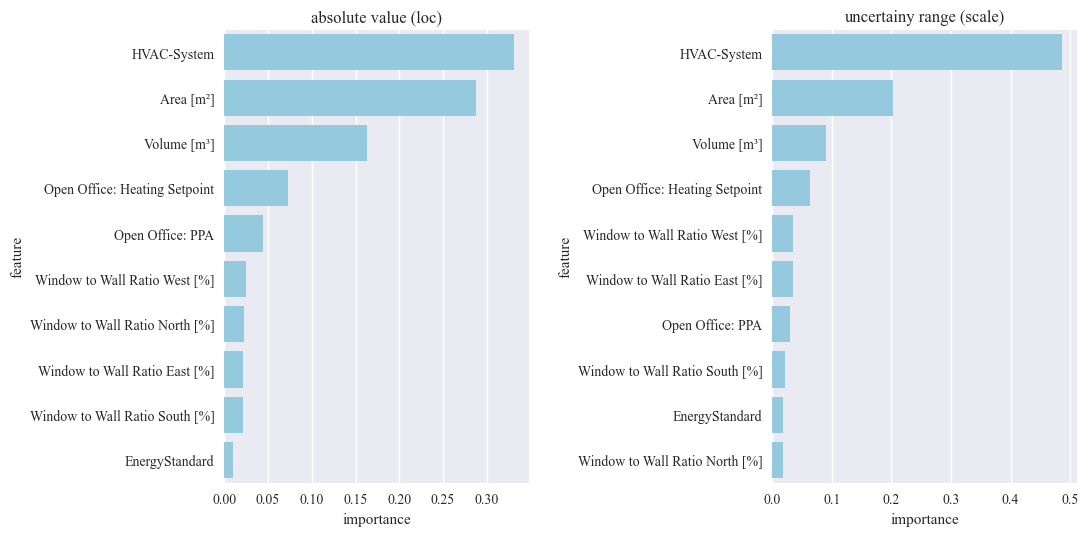

========== Prediction Output Ranges ==========


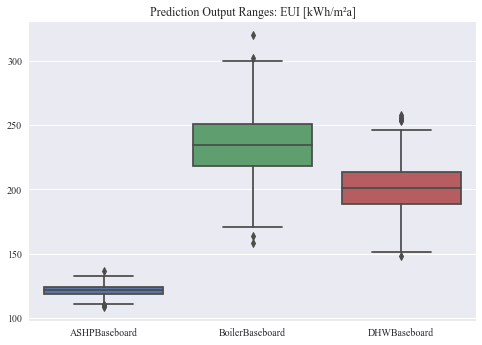

========== Variations ==========


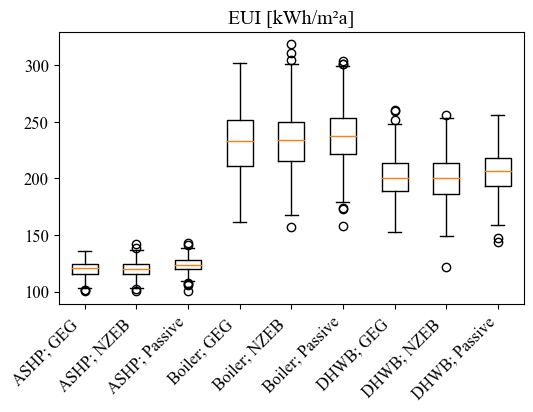

**************************************************
output is: EUI Heating [kWh/m²a]
[iter 0] loss=5.3213 val_loss=0.0000 scale=1.0000 norm=40.6995
[iter 100] loss=4.5295 val_loss=0.0000 scale=2.0000 norm=29.5177
[iter 200] loss=4.0164 val_loss=0.0000 scale=2.0000 norm=22.4452
[iter 300] loss=3.8167 val_loss=0.0000 scale=1.0000 norm=10.1381
[iter 400] loss=3.6837 val_loss=0.0000 scale=1.0000 norm=9.4058
None
NGB Result RMSE is 17.7364, NRMSE is 7.4802, SMAPE is 13.8392, MAE is 12.0518, MSE is 314.5783, R^2 is 0.8855
========== Feature Importance ==========


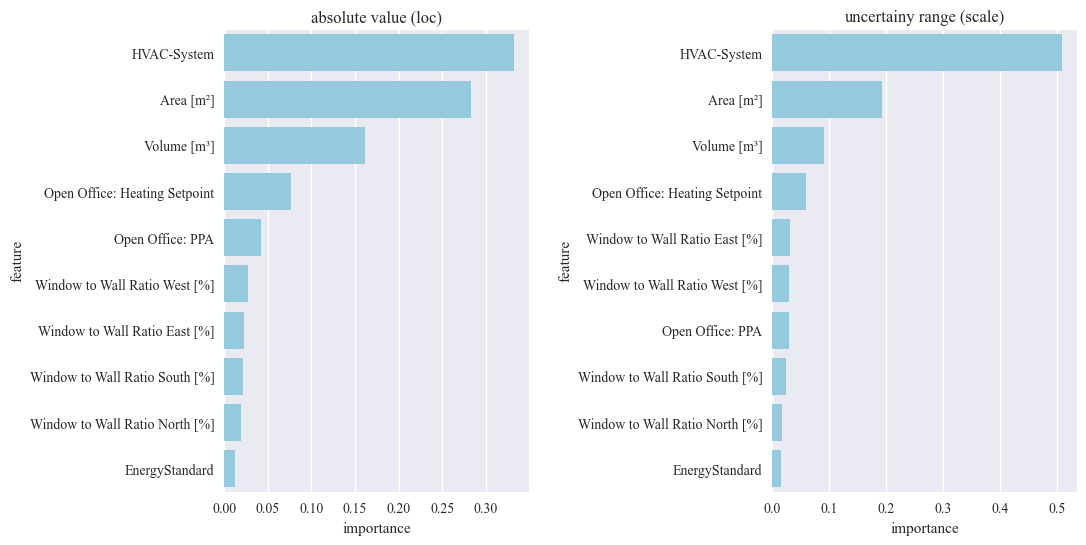

========== Prediction Output Ranges ==========


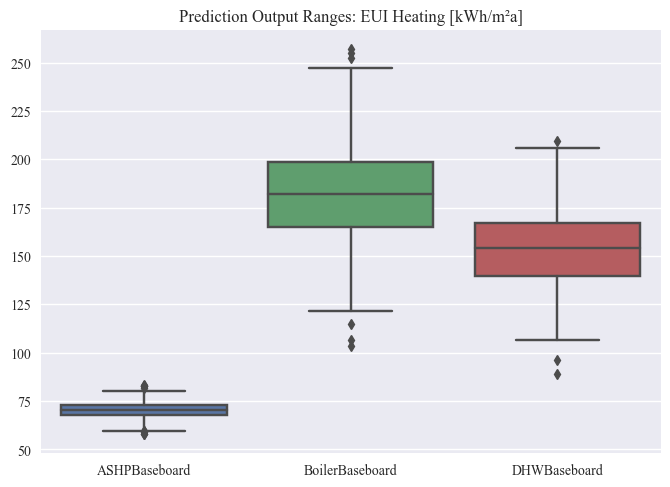

========== Variations ==========


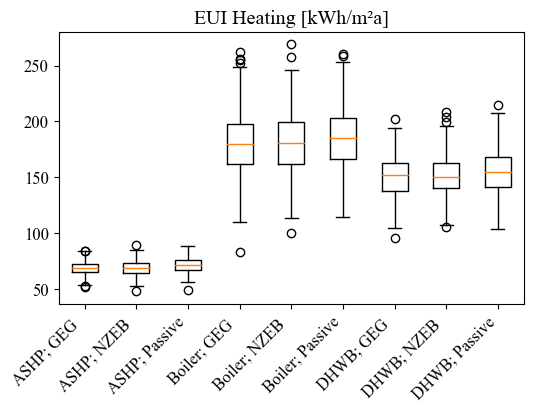

**************************************************
output is: EUI Electricity [kWh]
[iter 0] loss=4.6087 val_loss=0.0000 scale=1.0000 norm=22.5846
[iter 100] loss=3.7308 val_loss=0.0000 scale=2.0000 norm=11.7645
[iter 200] loss=3.0819 val_loss=0.0000 scale=2.0000 norm=7.9334
[iter 300] loss=2.7654 val_loss=0.0000 scale=1.0000 norm=3.6949
[iter 400] loss=2.6439 val_loss=0.0000 scale=1.0000 norm=3.5157
None
NGB Result RMSE is 6.1518, NRMSE is 4.6651, SMAPE is 6.2581, MAE is 4.2395, MSE is 37.8441, R^2 is 0.9438
========== Feature Importance ==========


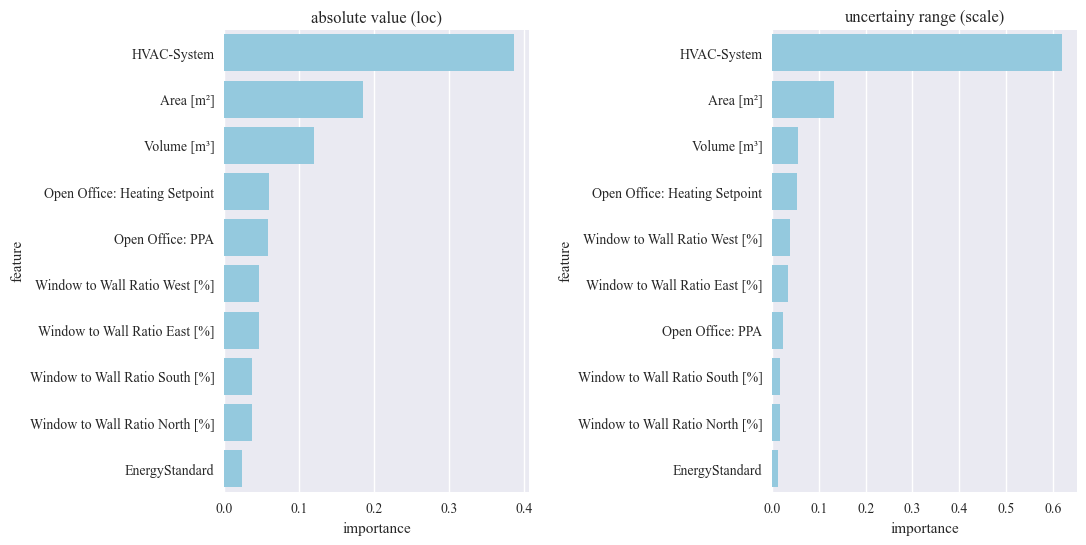

========== Prediction Output Ranges ==========


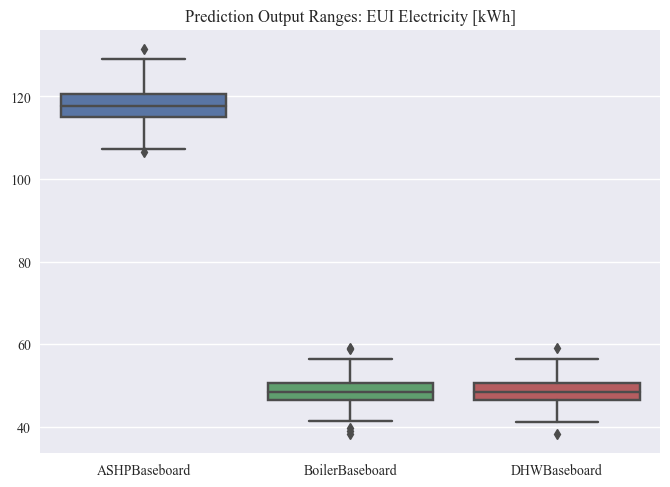

========== Variations ==========


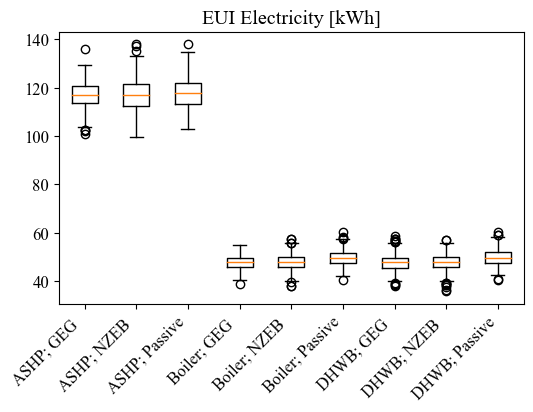

In [11]:
for output in output_cols:
    print('*'*50)
    print('output is:', output)
    y = df[output]
    X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, y, test_size=0.2, random_state=42)
    
    if(TRAIN is True):
        learner = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

        ngb = NGBRegressor(Base=learner)
        ngb = ngb.fit(X_train, y_train)
        print(ngb.best_val_loss_itr)

        y_preds = ngb.predict(X_test)
        y_dists = ngb.pred_dist(X_test)

        # Save model
        model_name = 'ngb_model.pklz'
        with gzip.open(model_name, 'wb') as ofp:
            pickle.dump(ngb, ofp)


    if(TRAIN is False):
        print('Loading model...')
        with gzip.open('ngb_model.pklz', 'rb') as ofp:
    #         pickle.dump(ngb, ofp)
            ngb = pickle.load(ofp)
        print('Done!')
        
        
    # Forecast & store the result
    y_preds = ngb.predict(X_test)
    y_dists = ngb.pred_dist(X_test)
    base_test = y_preds
    # print(len(base_test))
    # print(y_test)
    result_comp = pd.DataFrame()
    result_comp['y_pre'] = base_test
    result_comp['y_test'] = list(y_test.values.flatten())
    
    
    

    print('NGB Result RMSE is {}, NRMSE is {}, SMAPE is {}, MAE is {}, MSE is {}, R^2 is {}'.format('%.4f' % RMSE(result_comp['y_pre'],result_comp['y_test']),
                                                                                       '%.4f' % NRMSE(result_comp['y_pre'],result_comp['y_test']),
                                                             '%.4f' % SMAPE(result_comp['y_pre'],result_comp['y_test']), 
                                                             '%.4f' % MAE(result_comp['y_pre'],result_comp['y_test']),
                                                             '%.4f' % MSE(result_comp['y_pre'],result_comp['y_test']),
                                                             '%.4f' % metrics.r2_score(result_comp['y_test'],result_comp['y_pre'])))

    # Vis
    Vis_variant(ngb, df_variant, input_cols, output)
    
    